In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [109]:
df=pd.read_csv('liver_disease.csv')

In [110]:
df.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [111]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [112]:
df=df.dropna(axis=1)

In [113]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Dataset                       0
dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder


In [115]:

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
print(df['Gender'])

0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int64


In [116]:
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,1


In [117]:
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})  # 1 = liver patient, 0 = healthy


In [118]:
X=df.drop('Dataset',axis=1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin
0,65,0,0.7,0.1,187,16,18,6.8,3.3
1,62,1,10.9,5.5,699,64,100,7.5,3.2
2,62,1,7.3,4.1,490,60,68,7.0,3.3
3,58,1,1.0,0.4,182,14,20,6.8,3.4
4,72,1,3.9,2.0,195,27,59,7.3,2.4


In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 41.1 KB


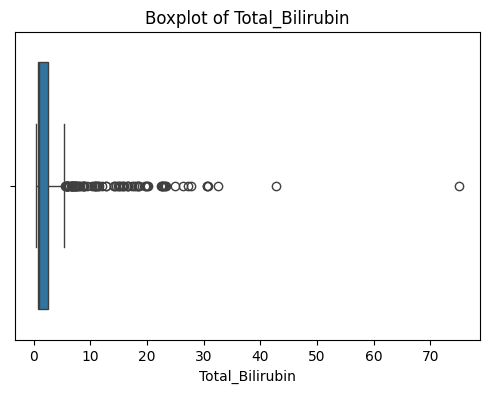

In [120]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Total_Bilirubin'])
plt.title('Boxplot of Total_Bilirubin')
plt.show()



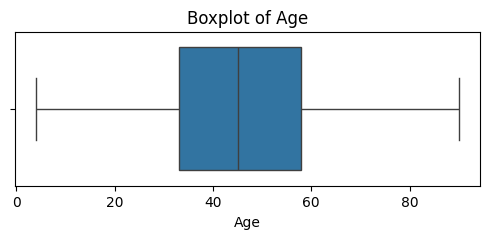

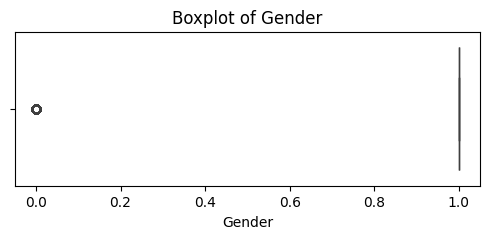

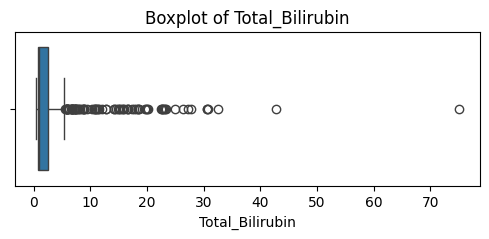

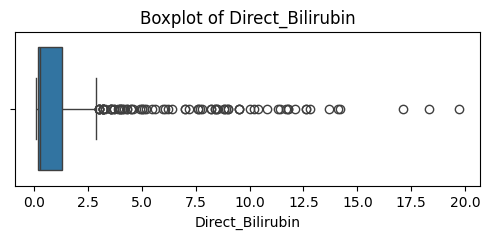

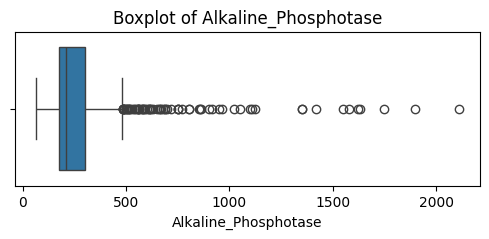

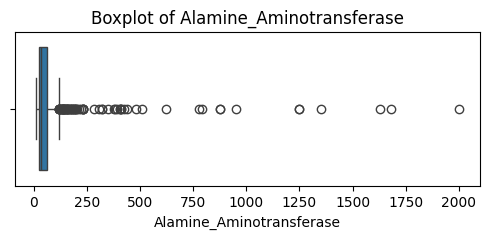

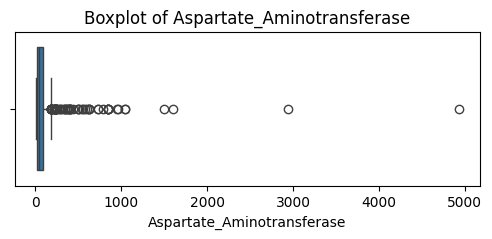

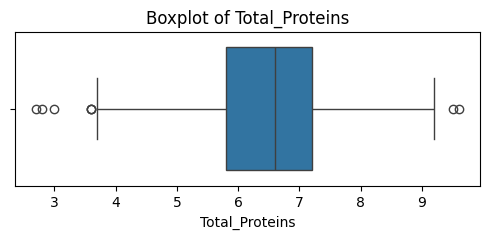

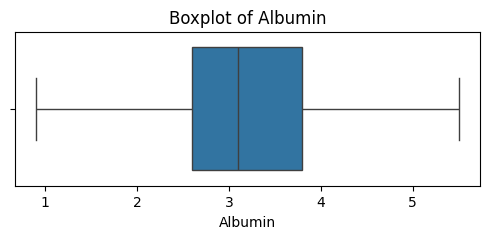

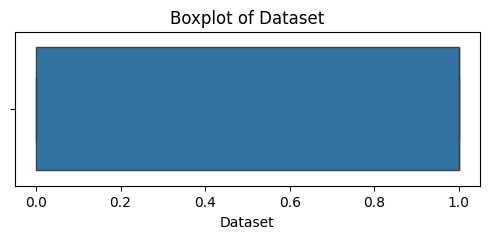

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


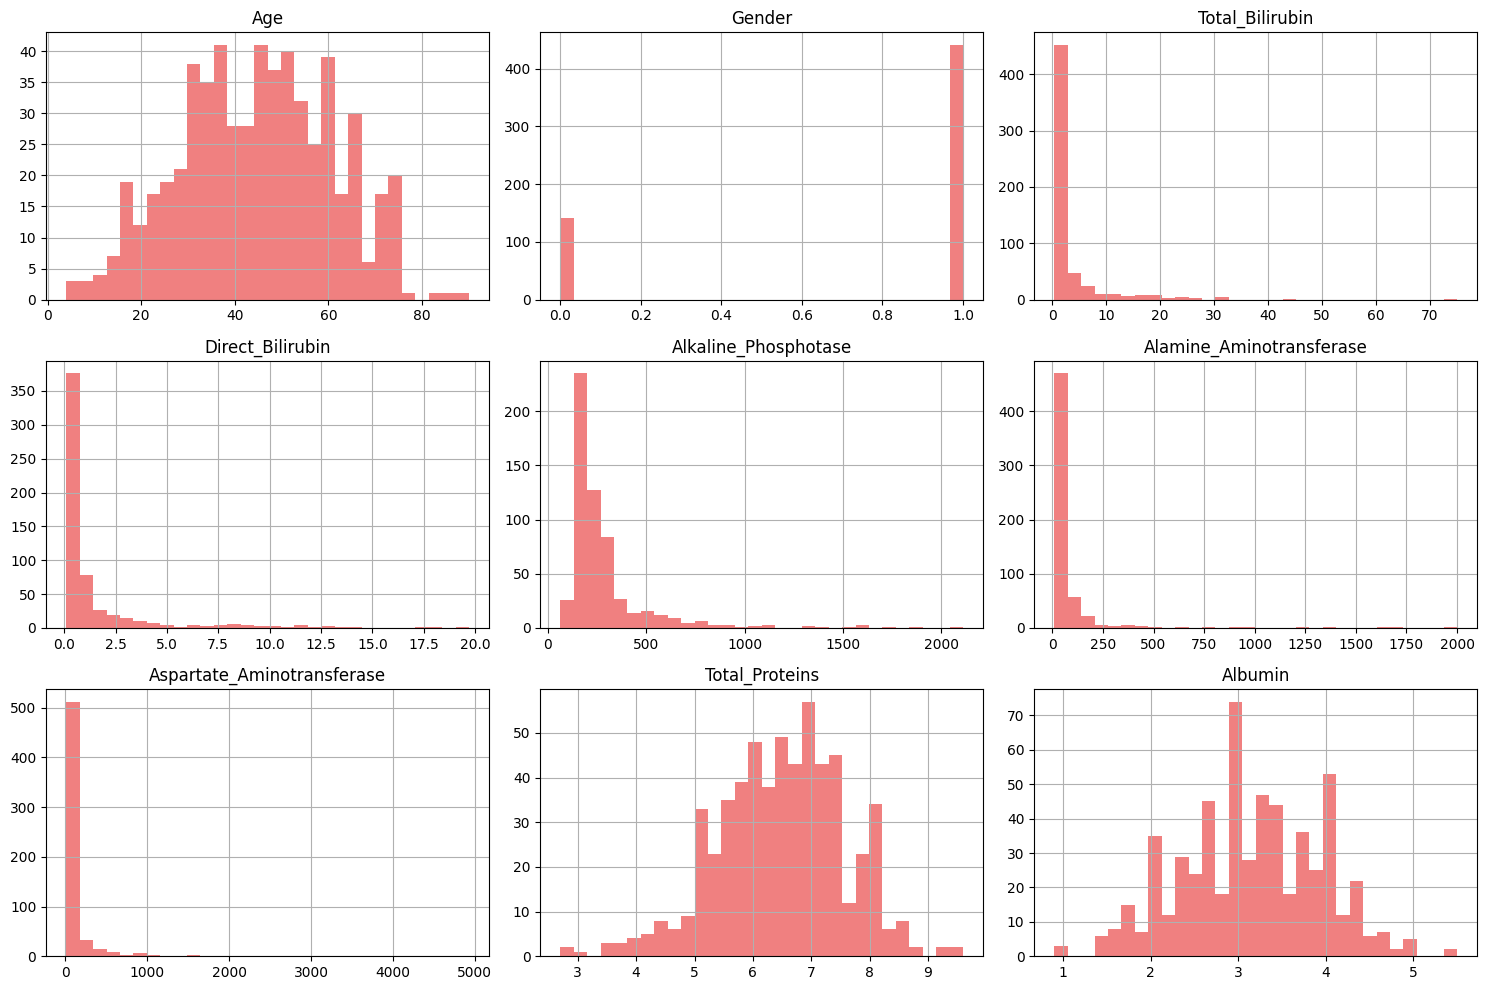

In [122]:
df[numerical_cols].hist(bins=30, figsize=(15,10), color='lightcoral')
plt.tight_layout()
plt.show()


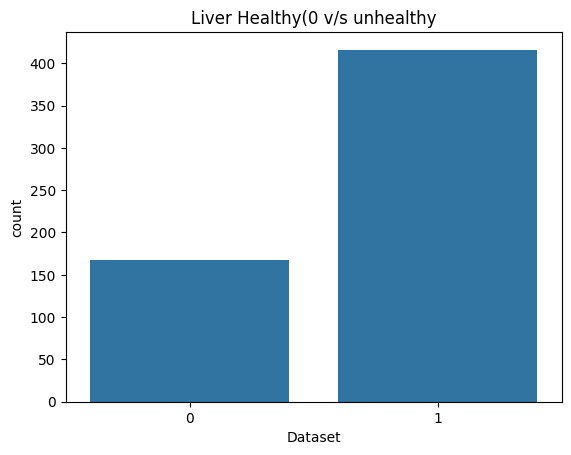

In [123]:
sns.countplot(x='Dataset',data=df)
plt.title('Liver Healthy(0 v/s unhealthy')
plt.show()

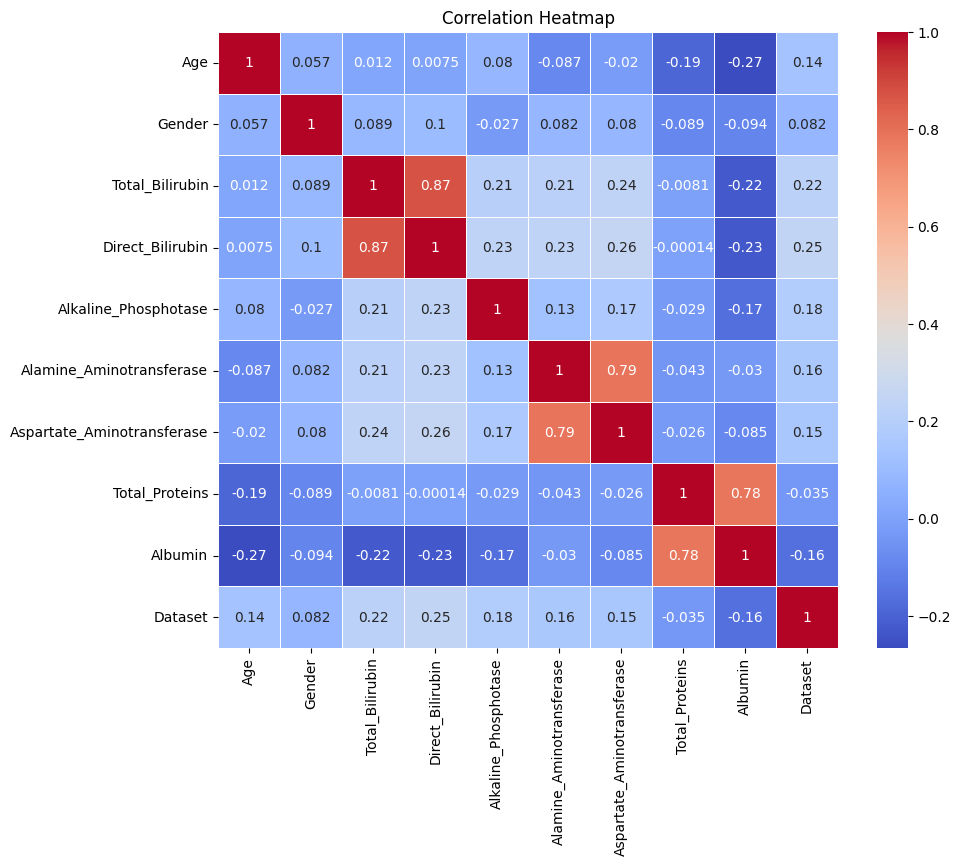

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [125]:
X['Total_Bilirubin'] = np.log1p(X['Total_Bilirubin'])
X['Direct_Bilirubin'] = np.log1p(X['Direct_Bilirubin'])
X['Alkaline_Phosphotase'] = np.log1p(X['Alkaline_Phosphotase'])
X['Alamine_Aminotransferase'] = np.log1p(X['Alamine_Aminotransferase'])
X['Aspartate_Aminotransferase'] = np.log1p(X['Aspartate_Aminotransferase'])
X['Total_Proteins'] = np.log1p(X['Total_Proteins'])


In [126]:
from sklearn.preprocessing import RobustScaler

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    scaler = RobustScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])


In [127]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin
0,65,0,0.530628,0.095310,5.236442,2.833213,2.944439,2.054124,3.3
1,62,1,2.476538,1.871802,6.551080,4.174387,4.615121,2.140066,3.2
2,62,1,2.116256,1.629241,6.196444,4.110874,4.234107,2.079442,3.3
3,58,1,0.693147,0.336472,5.209486,2.708050,3.044522,2.054124,3.4
4,72,1,1.589235,1.098612,5.278115,3.332205,4.094345,2.116256,2.4


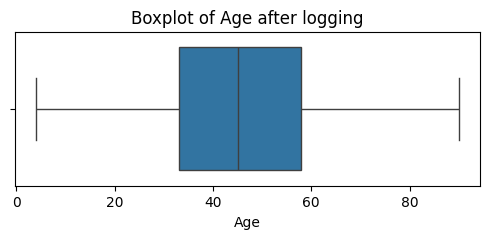

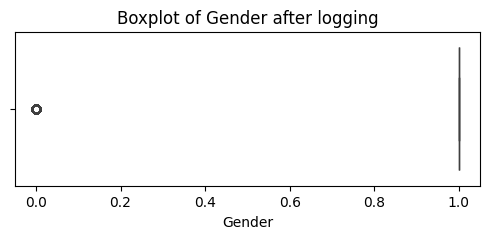

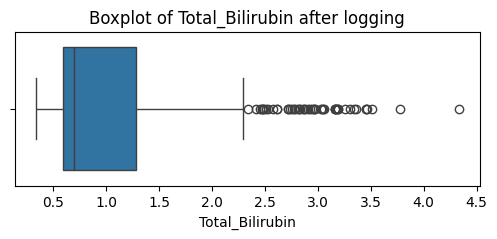

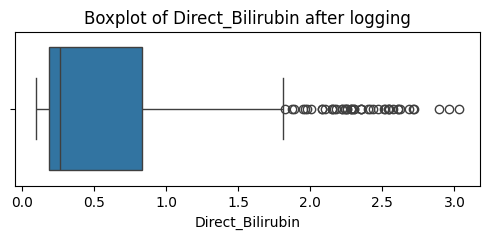

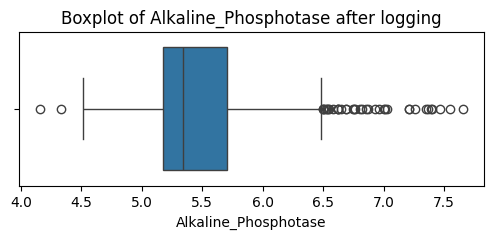

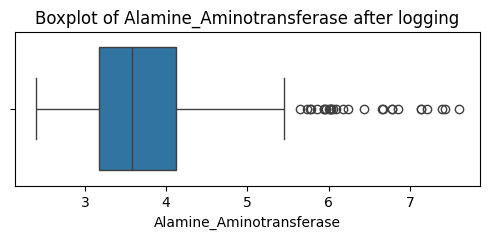

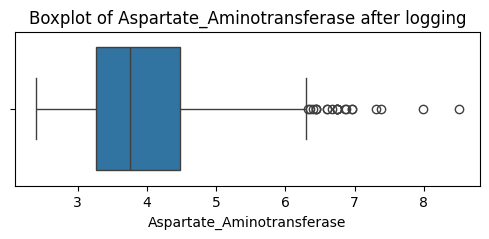

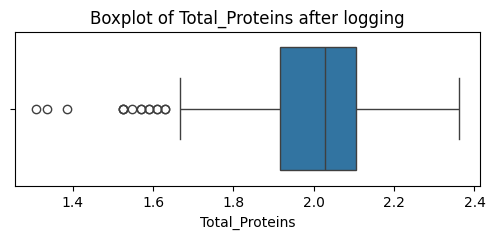

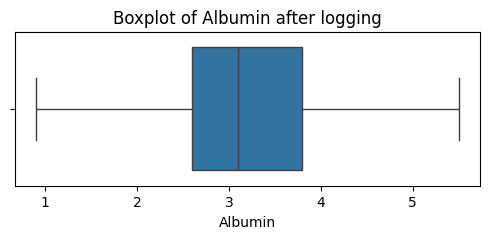

In [128]:
for col in X.select_dtypes(include=['float64', 'int64']): #after logging outliers
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col} after logging')
    plt.show()


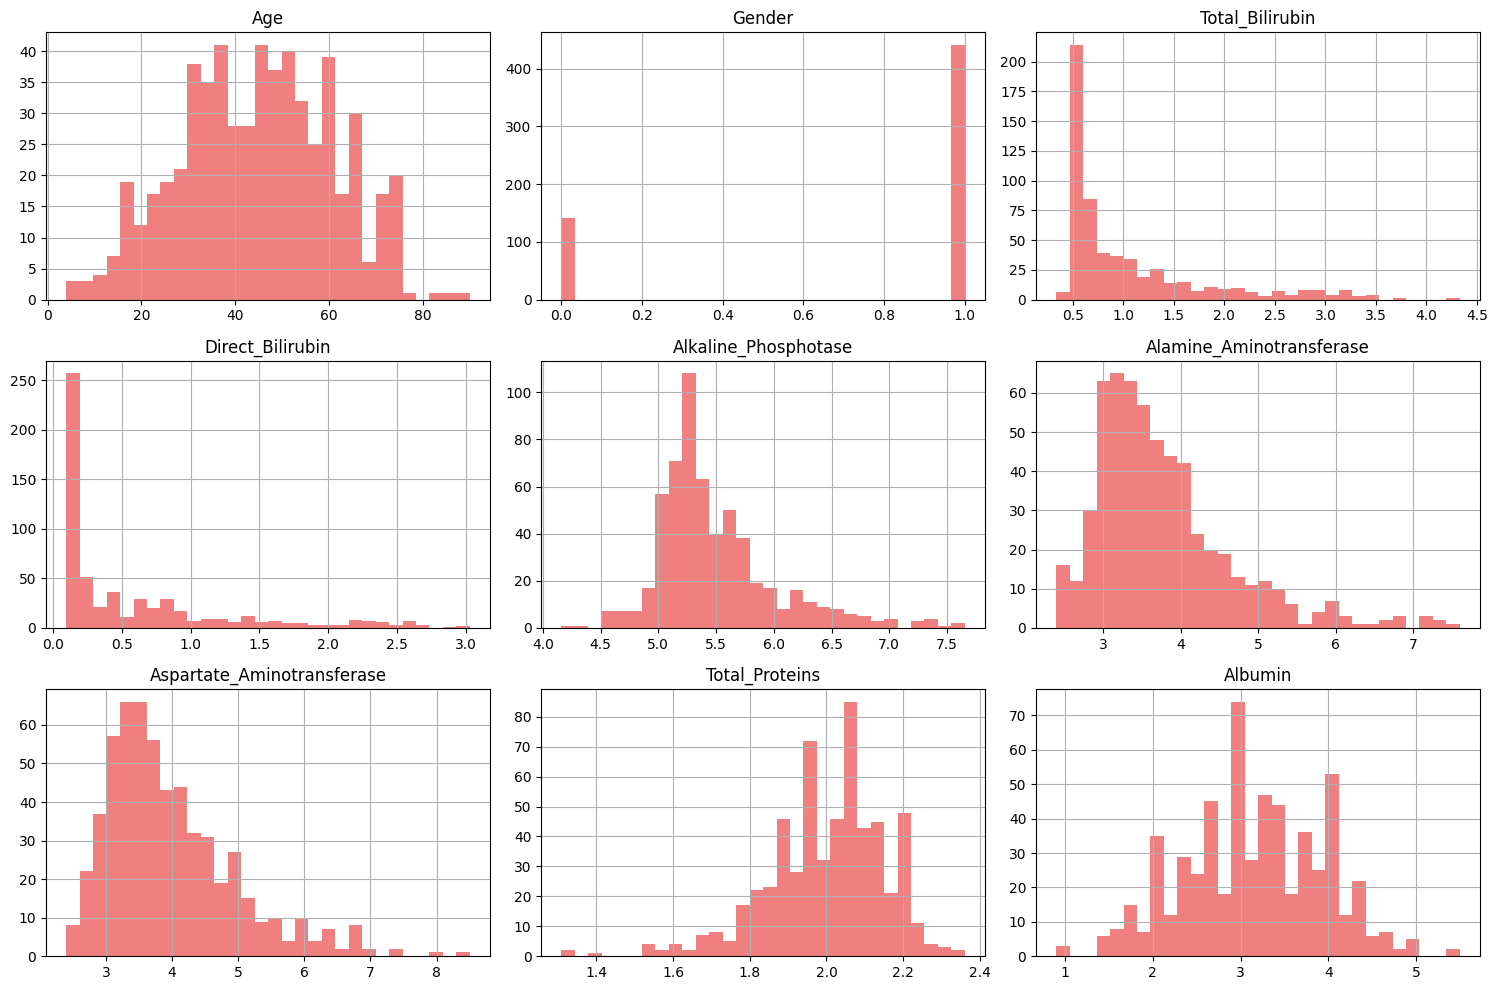

In [129]:
X[numerical_cols].hist(bins=30, figsize=(15,10), color='lightcoral') #after logging outliers
plt.tight_layout()
plt.show()

In [130]:
X = df.drop('Dataset', axis=1)
y = df['Dataset']


In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [133]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [134]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred=logreg.predict(X_test)
logreg_accuracy=accuracy_score(y_test,logreg_pred)

In [135]:
print(f'Logistic regression acurracy:{logreg_accuracy*100:.2f}')
print('/n Logistic regression Classification report:')
print(classification_report(y_test,logreg_pred))

Logistic regression acurracy:70.86
/n Logistic regression Classification report:
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        47
           1       0.75      0.91      0.82       128

    accuracy                           0.71       175
   macro avg       0.57      0.54      0.53       175
weighted avg       0.65      0.71      0.66       175



In [137]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.48      0.34      0.40        47
           1       0.78      0.87      0.82       128

    accuracy                           0.73       175
   macro avg       0.63      0.60      0.61       175
weighted avg       0.70      0.73      0.71       175



In [138]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)
print("Random Forest with SMOTE Report:")
print(classification_report(y_test, y_pred))

Random Forest with SMOTE Report:
              precision    recall  f1-score   support

           0       0.47      0.60      0.53        47
           1       0.84      0.76      0.80       128

    accuracy                           0.71       175
   macro avg       0.66      0.68      0.66       175
weighted avg       0.74      0.71      0.72       175



In [139]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
from xgboost import XGBClassifier
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)

y_pred = xgb.predict(X_test)
print("XGBoost with SMOTE Report:")
print(classification_report(y_test, y_pred))

XGBoost with SMOTE Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        47
           1       0.81      0.81      0.81       128

    accuracy                           0.73       175
   macro avg       0.65      0.65      0.65       175
weighted avg       0.73      0.73      0.73       175



C:\Users\sejal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:43:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

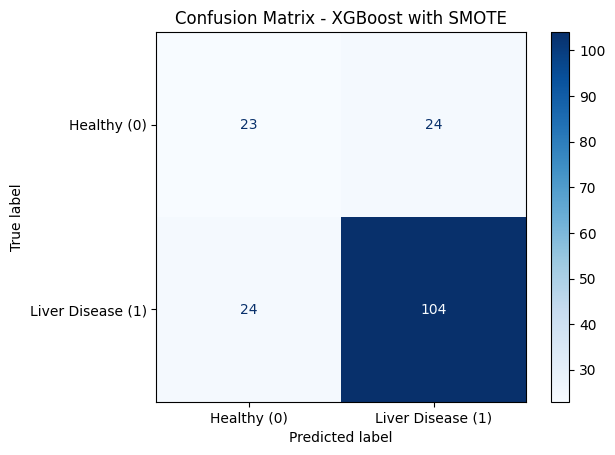

In [142]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy (0)', 'Liver Disease (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - XGBoost with SMOTE")
plt.show()